# (1.) openCV

In [ ]:
import cv2
import numpy as np

image = np.array([[1,0,2,1,0],    # ข้อมูลใน Pixxel ภาพ (สมมติ)
                  [0,2,3,0,1],
                  [1,0,1,1,2],
                  [0,2,2,0,3],
                  [0,4,1,2,0]])
image = image / 5.0   # ทำ Normalize ให้ได้ค่าสีใน Pxxel อยู่ในช่วง 0-1
image

array([[0.2, 0. , 0.4, 0.2, 0. ],
       [0. , 0.4, 0.6, 0. , 0.2],
       [0.2, 0. , 0.2, 0.2, 0.4],
       [0. , 0.4, 0.4, 0. , 0.6],
       [0. , 0.8, 0.2, 0.4, 0. ]])

สร้าง Kenel แล้วทำ Convolution 2D

In [ ]:
kernel1 = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
im2 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)    # Conv 2D
im2

array([[ 0. ,  1.4, -0.6, -1.2,  0. ],
       [ 0. ,  0.8,  0. , -0.6,  0. ],
       [ 0. ,  1. , -0.6,  0. ,  0. ],
       [ 0. ,  0.6, -0.6,  0.2,  0. ],
       [ 0. ,  1. , -1.2,  0.2,  0. ]])

ข้อมูล Pixel ภาพที่ได้จากการทำ Convolution จะเป็นเมทริกซ์ Array ซึ่งก็คือ Feature Map

In [ ]:
im2_int = (im2 * 5).astype('int')   # แปลงข้อมูลเป้น int เพื่อให้ดูง่ายขึ้น
im2_int     # Feature Map

array([[ 0,  7, -3, -6,  0],
       [ 0,  4,  0, -3,  0],
       [ 0,  5, -3,  0,  0],
       [ 0,  3, -3,  0,  0],
       [ 0,  5, -6,  0,  0]])

# (2.) Feature Map

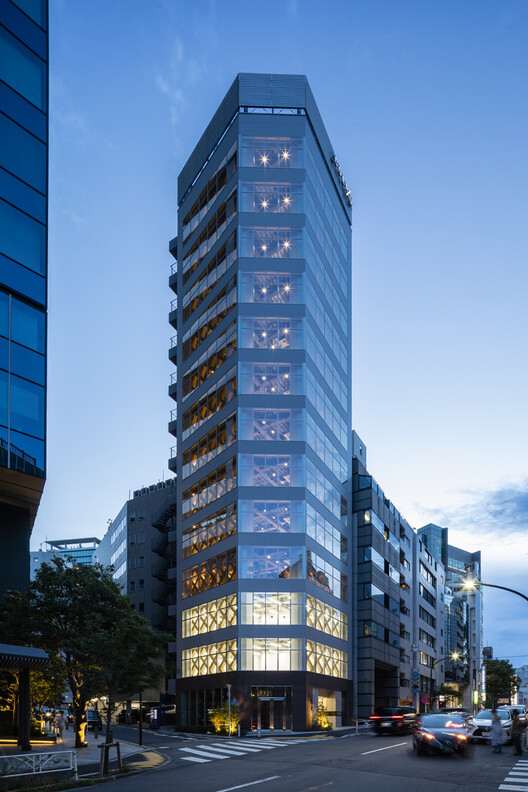

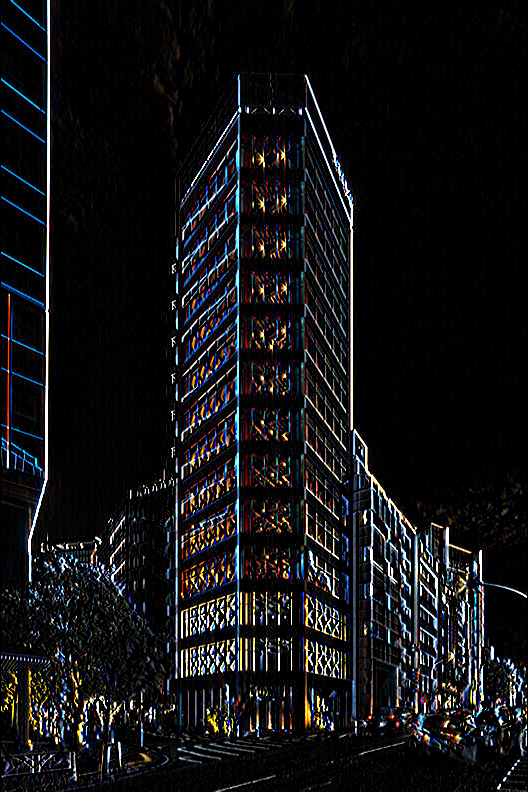

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# อ่านข้อมูลภาพอะไรก็ได้
image = cv2.imread('/content/drive/MyDrive/deep_greenbook/image/coeru-shibuya-offices-and-commercial-building-maeda-corporation_11.jpg')

if image is None:
  print('Could not read image')   # Print error ถ้ามีปัญหา

kernel_1 = np.array([[-1, 0, 1],  # Kernel สำหรับ Detect เส้นแนวดิ่ง
                     [-3, 0, 3],
                     [-1, 0, 1]])

fea_map = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_1)

cv2_imshow(image)
cv2_imshow(fea_map)    # หน้าต่างแสดงผลลัพธ์ Convolution 2D (Feature Map)
# cv2.imwrite('feature_map1.jpg', fea_map)    # save ภาพผลลัพธ์ (Feature Map ที่ได้)

# cv2.waitKey()   # รอการกดแป้นพิมพ์ใดๆ เพื่อปิดหน้าต่าง imshow
# cv2.destroyAllWindows()   # ปิดหน้าต่าง

- ภาพ feature map จะเป็นขาวดำ เส้นที่เป็นแนวดิ่งจะแสดงเป็นสีขาว ลักษณะเหมือนกับเน้นเส้นขอบที่เป้นแนวดิ่ง
- ส่วนเส้นขอบแนวนอน จะไม่แสดงให้เห็น ราวกับว่าถูกตัดออกไป
- ส่วนเส้นเอียง ยังพอเห็นขอบขาวอยู่บ้าง เนื่องจากในความเอียงก็ยังมีความเป็นแนวตั้งอยู่บ้าง

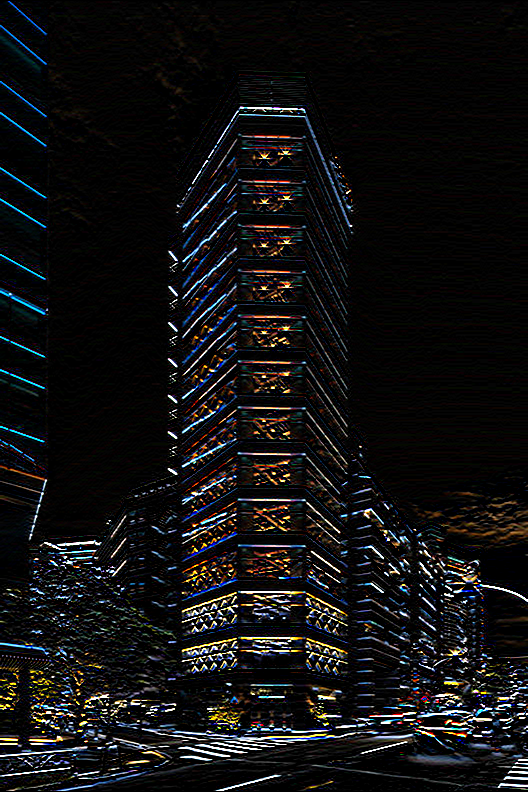

In [ ]:
kernel_1 = np.array([[-1, -3, -1],  # Detect เส้นแนวนอน
                     [0, 0, 0],
                     [1, 3, 1]])
fea_map = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_1)
cv2_imshow(fea_map)

จะเห็นขอบที่เป็นเส้นแนวนอนชัดมาก ส่วนของเส้นขอบแนวดิ่งแทบไม่มี แต่ถ้าเส้นเอียง ก็จะพอมีให้เห็น เนื่องจากในความเอียงก็ยังมีความเป็นแนวนอนผสมอยู่

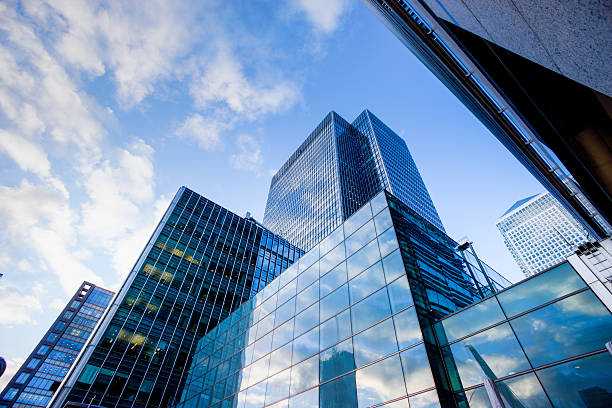

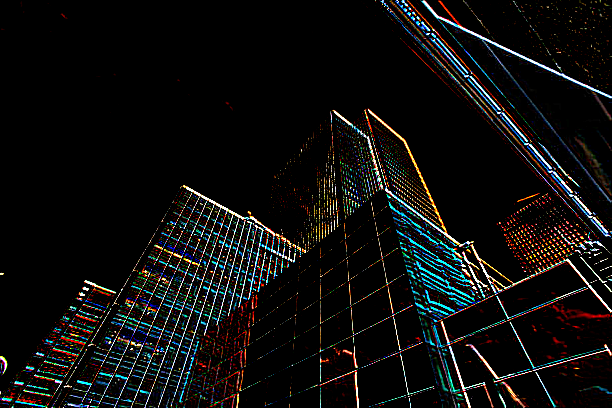

In [ ]:
image = cv2.imread('/content/drive/MyDrive/deep_greenbook/image/istockphoto-511061090-612x612.jpg')
kernel_1 = np.array([[0, 1, 3],  # Detect เส้นแนวเอียงซ้าย (\)
                     [-1, 0, 0],
                     [-3, -1, 0]])
fea_map = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_1)
cv2_imshow(image)
cv2_imshow(fea_map)

แทบไม่เห็นขอบเส้นที่เอียงทาง**ขวา**

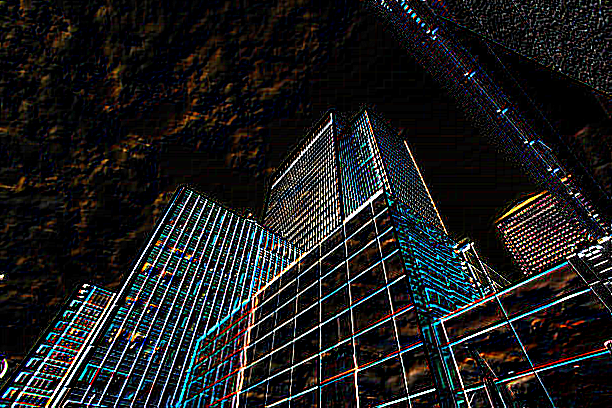

In [ ]:
kernel_1 = np.array([[-3, -1, 0],  # Detect เส้นแนวเอียงขวา (/)
                     [-1, 0, 1],
                     [0, 1, 3]])
fea_map = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_1)
cv2_imshow(fea_map)

แทบไม่เห็นขอบเส้นที่เอียงทาง**ซ้าย**

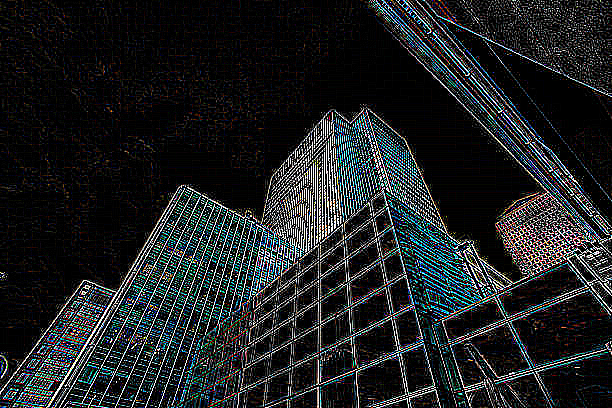

True

In [ ]:
kernel_1 = np.array([[-1, -1, -1],  # Detect เส้นขอบทั้งหมด
                     [-1, 8, -1],
                     [-1, -1, -1]])
fea_map = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_1)
cv2_imshow(fea_map)
cv2.imwrite('fea_map1.jpg', fea_map)    # save ภาพผลลัพธ์ (Feature Map ที่ได้)

แสดงเส้นขอบทั้งหมด

# (3.) Pooling

ทำการ pooling โดยใช้ TensorFlow ซึ่งยกตัวอย่างข้อมูล Input Image ที่มีมิติ WxH=5x5 มีค่าตัวเลขใน Pixel ตามนี้

In [ ]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D
import cv2
from google.colab.patches import cv2_imshow

image = np.array([[2, 3, 4, 2],   # ข้อมูลใน Pixel ภาพ
                  [8, 5, 5, 1],
                  [6, 7, 9, 4],
                  [3, 1, 4, 5]])
cv2_imshow(image)

เนี่องจาก Max Pooling ใน TensorFlow รองรับการทำงานกับภาพที่มี 3 Channel (RGB) และมีข้อกำหนดว่า ต้องจัดรูปแบบข้อมูลเป็น Tuple ในรูปแบบ (indexภาพ, W, H, channel) แต่ในตัวอย่างนี้ ภาพที่กำหนด (ตัวแปร image) ยังไม่อยู่ในรูปแบบดังกล่าว (คือมีเพียง W,H เท่านั้น) ดังนั้น จะต้องจัดรูปแบบด้วย reshape ดังนี้

In [ ]:
# reshape เปลี่ยนให้เป็นข้อมูล 1 แถว ที่มีขนาด 4*4 และ 1 Channel (สีเดียว)
arr = image.reshape(1, 4, 4, 1)
arr

array([[[[2],
         [3],
         [4],
         [2]],

        [[8],
         [5],
         [5],
         [1]],

        [[6],
         [7],
         [9],
         [4]],

        [[3],
         [1],
         [4],
         [5]]]])

สร้าง Model โดยกำหนดชั้น Max Pooling เพิ่ม

In [ ]:
# สร้าง Sequential model ที่มีเฉพาะ Pooling layer
model = Sequential()

# model.add(MaxPool2D((2,2)))   # เขียนแบบนี้ก็ได้
model.add(MaxPool2D(pool_size=(2,2)))

# ประมวลผลให้ได้ Ouput ที่ผ่าน Pooling แล้ว
output = model.predict(arr)   # มิติ (1, 2, 2, 1)
print(output)

output = np.squeeze(output)   # reshape ตัดแกนออกไป กลายเป็น (2, 2)
print("\n",output)

1/1 [==============================] - 0s 61ms/step
[[[[8]
   [5]]

  [[7]
   [9]]]]

 [[8 5]
 [7 9]]


ค่าที่ได้หลังผ่านการ Pooling จะมีมิติ (W,H) ลดลงครึ่งหนึ่ง (ลดลงไป 2 เท่า) เพราะเราใช้ pool_size=(2,2)

ถ้าเราใช้ pool_size=(4,4) ผลลัพธ์ที่ได้จะมีมิติลดลงไป 4 เท่า

ถ้าใช้วิธี Average Pooling ให้เปลี่ยนโค้ดในส่วนของค่า Array ้องกำหนดให้เป็นทศนิยม เนื่องจากผลการคำนวณหาค่าเฉลี่ยส่วนใหญ่มีทศนิยม

In [ ]:
# เปลี่ยนชนิดข้อมูลเป็น float
arr = image.reshape(1, 4, 4, 1).astype('float32')
arr

array([[[[2.],
         [3.],
         [4.],
         [2.]],

        [[8.],
         [5.],
         [5.],
         [1.]],

        [[6.],
         [7.],
         [9.],
         [4.]],

        [[3.],
         [1.],
         [4.],
         [5.]]]], dtype=float32)

In [ ]:
# สร้าง Sequential model ที่มีเฉพาะ Pooling layer
model = Sequential()

model.add(AveragePooling2D((2,2)))

# ประมวลผลให้ได้ Ouput ที่ผ่าน Pooling แล้ว
output = model.predict(arr)   # มิติ (1, 2, 2, 1)
print(output)

output = np.squeeze(output)   # reshape ตัดแกนออกไป กลายเป็น (2, 2)
print("\n",output)

1/1 [==============================] - 0s 47ms/step
[[[[4.5 ]
   [3.  ]]

  [[4.25]
   [5.5 ]]]]

 [[4.5  3.  ]
 [4.25 5.5 ]]


# (4.) Pooling ต่อจาก Feature Map

ข้อนี้เราจะทำ FeatureMap -> Max Pooling

กรณีใช้ Jupyter Lab จาก Anaconda

In [ ]:
pip install Pillow

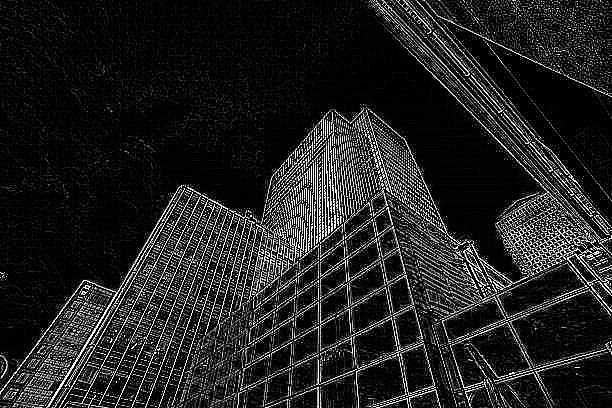

In [ ]:
from PIL import Image, ImageOps
import numpy as np

# รูปภาพทั่วไป หรือ Feature Map จากข้อ 2
imgfile = '/content/drive/MyDrive/deep_greenbook/image/fea_map1.jpg'
image = Image.open(imgfile).convert('L')    # อ่านข้อมูลภาพจากไฟล์
image     # แสดงผลของภาพ

ตรวจสอบขนาดของภาพ Feature Map ที่จะใช้เป็น Input Image ของ Pooling

In [ ]:
pixel = np.array(image)
pixel.shape

(408, 612)

1/1 [==============================] - 0s 75ms/step


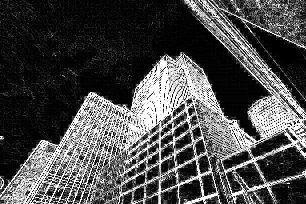

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D

# arr = pixel.reshape(1, 408, 612, 1) # นำขนาดจากด้านบนมากำหนดเข้าไปตรงๆ
arr = pixel.reshape(1, pixel.shape[0], pixel.shape[1], 1) # ให้โปรแกรมอ่านขนาดเอง

# สร้าง Sequential model ที่มีเฉพาะ Pooling layer
model = Sequential()
model.add(MaxPool2D(pool_size=(2,2))) # กรณีใช้ 2x2 จะเลื่อนทีละ 2 stride

output = model.predict(arr)
# Image.fromarray(output) ก่อน squeeze แล้วจะ error
output = np.squeeze(output)
Image.fromarray(output)

ขนาดภาพลดลง 2 เท่า

1/1 [==============================] - 0s 54ms/step


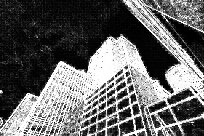

In [ ]:
# สร้าง Sequential model ที่มีเฉพาะ Pooling layer
model = Sequential()
model.add(MaxPool2D(pool_size=(3,3))) # กรณีใช้ 3x3 จะเลื่อนทีละ 3 stride

output = model.predict(arr)
# Image.fromarray(output) ก่อน squeeze แล้วจะ error
output = np.squeeze(output)
Image.fromarray(output)

ขนาดภาพลดลง 3 เท่า

# (5.) สร้าง Model และดู Kernel

ข้อนี้แสดงการสร้าง Model ดู Kernel และผลของ Feature map ที่ไดเในแต่ละชั้น Layer โดย Model มีโครงสร้าง Convolution+MaxPooling 3 ชั้น ดังนี้
- ชั้นแรก Convolution(เรียกย่อ Conv2D)+MaxPooling(เรียกย่อ MaxPool) มี Kernel=32 รับ input ขนาด 100x100x3 (ภาพสี 3 Channel) โดยกำหนดให้ชั้น Conv2D ใช้ activtion ReLU (ประมวลผลก่อนส่งให้ชั้นถัดไป)
- ชั้นที่2 Conv2D และ MaxPool มี Kernel=64
- ชั้นที่3 Conv2D และ MaxPool มี Kernel=128

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import numpy as np

in_shape = (100, 100, 3)
model = Sequential()    # สร้าง Model

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) # layer 1
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu')) # layer 2
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu')) # layer 3
model.add(MaxPool2D((2,2)))

model.add(Flatten())  # ยังไม่ได้ใช้ แต่ใส่ไปก่อน
model.add(Dense(3, activation='softmax'))
model.summary()   # ดูสรุปโครงสร้าง Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

แสดงโครงสร้าง Model

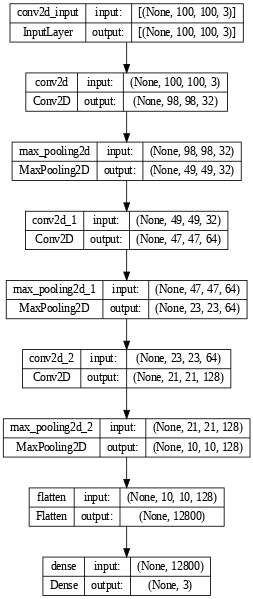

In [ ]:
# Visualize the model
import keras
keras.utils.plot_model(model, dpi=60, show_shapes=True)

- ดู kernel

เราสามารถลิสรายชื่อชั้น Layer ทั้งหมดได้จาก model.layers แต่ในตอนนี้ต้องการดู Kernel ของ Conv2D เท่านั้น ดังนั้น ให้คัดเอาเฉพาะคำว่า conv เท่านั้นจากรายชื่อลิส

In [ ]:
for layer in model.layers:  # เอารายชื่อ Layer
  if 'conv' not in layer.name:  # เอาเฉพาะ Convolutional layer เท่านั้น
    continue
  kernels, biases = layer.get_weights()   # อ่านค่า Kernel weights
  print(layer.name, 'shape:', kernels.shape)  # แสดงชื่อและ shape

conv2d shape: (3, 3, 3, 32)
conv2d_1 shape: (3, 3, 32, 64)
conv2d_2 shape: (3, 3, 64, 128)


ในแต่ละชั้น Conv2D จะมี Kernel หลายตัว เช่น ชั้นแรก มี 32 ตัว หากต้องการดูตัวใดต้องกำหนดให้อ่านค่า index ที่ต้องการ เช่น ต้องการอ่าน Kernel ของตัวแรก

In [ ]:
model_layer_idx = 0   # ระบุลำดับ index ของ Kernel ที่ต้องการ
kernels, biases = model.layers[model_layer_idx].get_weights()   # อ่านค่า
kernels.shape

(3, 3, 3, 32)

ต้องการให้แสดงผลเป็นรูปภาพ ดังนั้นทำการ Normalize แล้วดูข้อมูลภายใน

In [ ]:
# โค้ดนี้ถ้า run เกิน 1 ครั้ง มันจะ MinMaxScaler ซ้ำ ไม่ควรทำ!!!
k_min, k_max = kernels.min(), kernels.max()
kernels = (kernels - k_min) / (k_max - k_min)
kernel_idx = 0
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

[[0.33 0.7  0.01]
 [0.42 0.12 0.97]
 [0.09 0.52 0.27]]


นำค่าจาก Kernel ด้านบนมาทำการพล็อตดู ค่าสูงจะมีสีสว่าง ค่าต่ำจะมีสีมืด

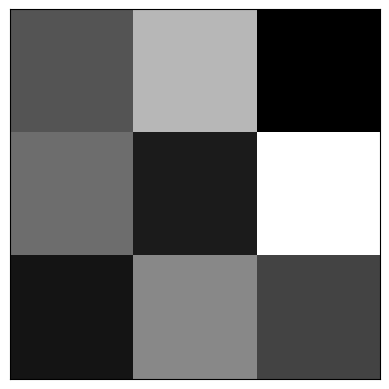

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(kernel_i, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

ลองพล็อตดูหลาย Kernel ให้วนรอบอ่านค่าของ index ดังนี้

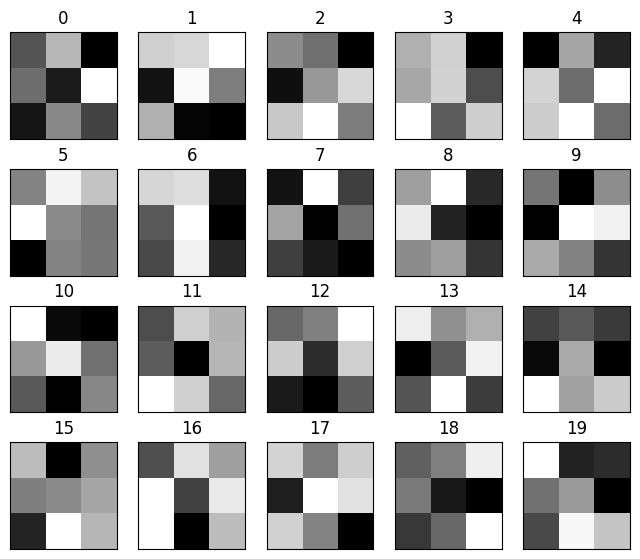

In [ ]:
nplots = 20   # จำนวน Kernel ที่ต้องการ plot
fig = plt.figure(figsize=(8, 6.8))  # ขนาดพล็อต
for j in range(nplots):
  plt.subplot(4, 5, j+1)  # จำนวน row, column
  plt.imshow(kernels[:, :, 0, j], cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([]); plt.yticks([])
plt.show()

Kerenel แต่ละตัวมีค่าความเข้มสีแตกต่างกัน

# (6.) ดู Feature Map

ข้อนี้จะแสดงผลลัพธ์ Feature ที่ได้จากแต่ละ Kernel ว่ามีลักษณะเป็นอย่างไร โดยทำการป้อน Input Image ภาพสีอะไรก็ได้ ขนาดเท่าใดก็ได้

ใช้ Model จากข้อที่ 5 ให้ input shape เข้า Conv2D ชั้นแรกเป็น (100, 100, 3) (ภาพสี 3 Channel) โดยในโค้ดจะทำการลดขนาดภาพให้เป็น 100x100(WxH)

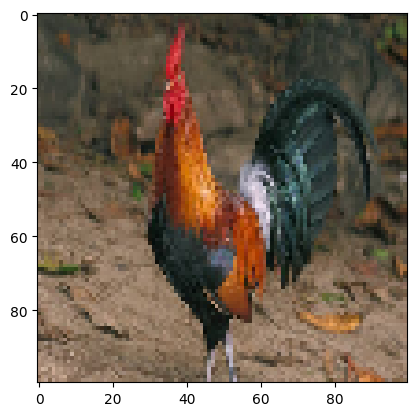

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
import matplotlib.pyplot as plt

# โหลดภาพมาแล้วปรับให้เป็นขนาด 100x100
image = load_img('/content/drive/MyDrive/deep_greenbook/image/chick_home.png', target_size=(100, 100))
plt.imshow(image)
plt.show()    # แสดงภาพ

เปลี่ยนข้อมูลภาพให้เป็น Array แล้วตรวจสอบมิติภาพ และค่าสีของ Pixel

In [ ]:
import numpy as np
img = img_to_array(image)
print('shape=',img.shape)
print('max pixel value=',np.max(img))

shape= (100, 100, 3)
max pixel value= 255.0


shape= (Width, Height, Channel), Channel = 3 (RGB)

max pixel value -> ค่าสูงสุด(Max)ใน Pixel

จัดรูปแบบข้อมูลให้อยู่ในรูปแบบ batch_size, w, h, channel โดย batch_size คือ จำนวน Sample หรือจำนวนภาพที่ส่งเข้า Conv2D ซึ่งในตอนนี้มีอยู่ 1 ภาพ

In [ ]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 100, 100, 3)

## Convo2D ชั้นแรก
ดู Feature Map ที่ได้จาก Convolution ชั้นแรก (Layer 0)

In [ ]:
from tensorflow.keras.models import Model

layer_idx = 0     # Layer แรก
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 46ms/step


(1, 98, 98, 32)

ภาพ Feature Map ที่ผ่าน Convo2D มีรายละเอียดดังนี้
- มีจำนวน 1 sample (จากการป้อนภาพเข้าไป 1 ภาพ)
- มิติ คือ 98x98 (WxH) ลดลงจากเดิมคือ 100x100 สาเหตที่ลดลงเพราะไม่ได้เติม Padding
- จำนวนภาพ Feature Map มี 32 ภาพ ตามที่กำหนดใน `model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) # layer 1`

ทำการ Normalize แล้วพล๊อตดูรูปภาพ Feature Map

In [ ]:
f_min, f_max = feature_maps.min(), feature_maps.max()
feature_maps = (feature_maps - f_min) / (f_max - f_min)
feature_maps.min(), feature_maps.max()

(0.0, 1.0)

ข้อมูล min, max ใน Pixel ภาพ

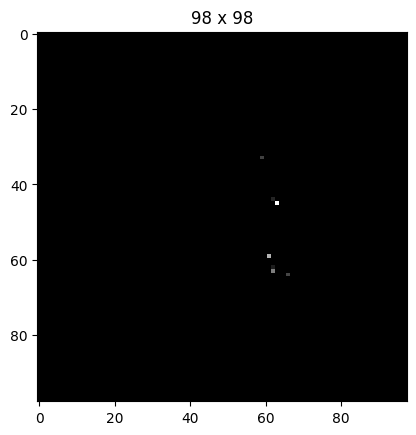

In [ ]:
sample_idx = 0  # ลำดับ Sample=0 คืออันแรก (มีภาพ Sample อยู่ภาพเดียว) กำหนด 0 เท่านั้น
fea_idx = 0   # ลำดับ index ของ Feature Map ที่ต้องการ (ลำดับแรกคือ 0)
feature_map_i = feature_maps[sample_idx, :, :, fea_idx]

plt.title('{} x {}'.format(feature_map_i.shape[0], feature_map_i.shape[0]))
plt.imshow(feature_map_i, cmap=plt.cm.gray)
plt.show()

จะได้ภาพ Feature ลำดับแรก fea_idx=0 (บางคนอาจได้ผลต่างจากแบบนี้) โดยขนาดจะลดลงเหลือ 98x98 เนื่องจากไม่ได้เติม Padding

ต้องการดู Feature Map อื่นๆ เช่น แสดง 30 ลำดับ (ทั้งหมดมี 32 Feature Map)

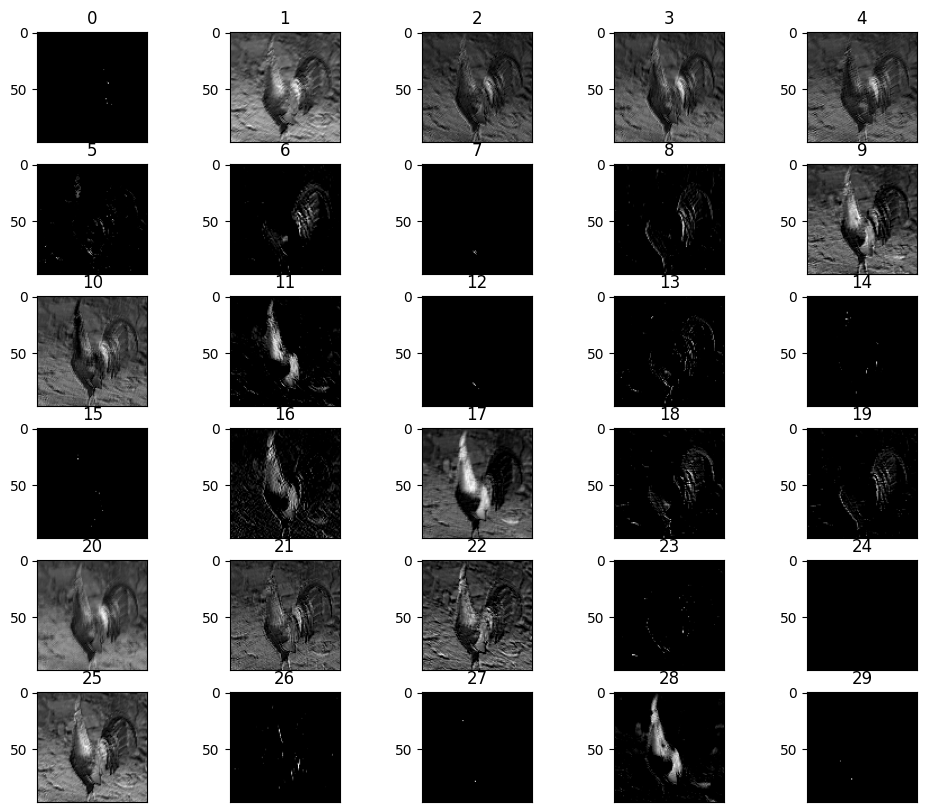

In [ ]:
nplots = 30   # จำนวน Feature Map ที่ต้องการแสดง
fig = plt.figure(figsize=(12, 10))    # ขนาดพล็อต
for j in range(nplots):
  plt.subplot(6, 5, j+1)    # จำนวน row, column
  plt.imshow(feature_maps[sample_idx, :, :, j],  cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([])
plt.show()

## ดู Layer MaxPooling 1
ที่ผ่านมา เป็นภาพที่ผ่าน Conv2D (Layer id = 0) ลำดับต่อไปลองดูภาพที่ได้จาก MaxPooling(Layer id=1)

In [ ]:
from tensorflow.keras.models import Model

layer_idx = 1     # MaxPooling 1
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 70ms/step


(1, 49, 49, 32)

Feature Map จะเหลือมิติ WxH = 49x49 (เล็กลง 2 เท่า) และจำนวน Feature Map เท่าเดิม โดยค่า1 ตัวแรก คือจำนวน Sample เนื่องจากในที่นี้มีภาพอินพุตภาพเดียว

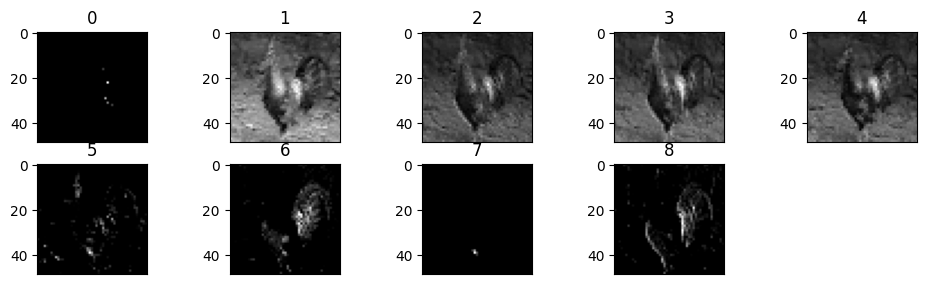

In [ ]:
nplots = 9   # จำนวน Feature Map ที่ต้องการแสดง
fig = plt.figure(figsize=(12, 10))    # ขนาดพล็อต
for j in range(nplots):
  plt.subplot(6, 5, j+1)    # จำนวน row, column
  plt.imshow(feature_maps[0, :, :, j],  cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([])
plt.show()

## ดู Layer Convo2D และ MaxPooling ชั้นถัดๆไป

ดูภาพที่ออกจาก Conv2D และ MaxPooling ชั้นที่ 2

In [ ]:
from tensorflow.keras.models import Model

layer_idx = 2     # Conv2D ชั้นที่ 2
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 56ms/step


(1, 47, 47, 64)

In [ ]:
layer_idx = 3     # MaxPooling ชั้นที่ 2
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 156ms/step


(1, 23, 23, 64)

สังเกตว่าหลัง MaxPooling ตัว Feature Map จะเหลือมิติ WxH = 23x23 และมีจำนวน 64 ภาพ ถ้าแสดงภาพจะเห็นได้ชัดว่าภาพหยาบกว่าเดิม

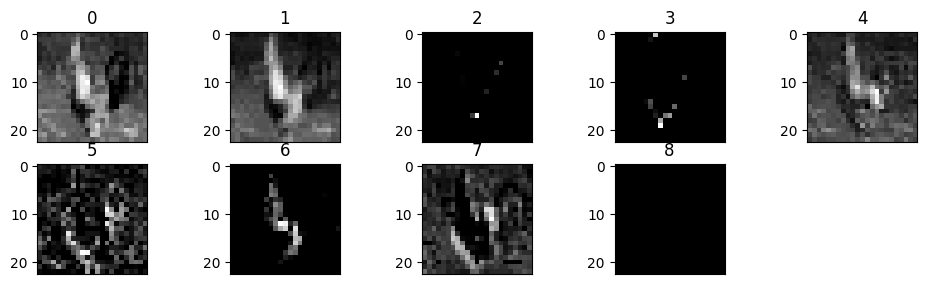

In [ ]:
nplots = 9   # จำนวน Feature Map ที่ต้องการแสดง
fig = plt.figure(figsize=(12, 10))    # ขนาดพล็อต
for j in range(nplots):
  plt.subplot(6, 5, j+1)    # จำนวน row, column
  plt.imshow(feature_maps[0, :, :, j],  cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([])
plt.show()

ดูภาพที่ออกจาก Conv2D และ MaxPooling ที่ชั้น 3

In [ ]:
layer_idx = 4    # Conv2D ชั้นที่ 3
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 304ms/step


(1, 21, 21, 128)

In [ ]:
layer_idx = 5     # MaxPooling ชั้นที่ 3
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 104ms/step


(1, 10, 10, 128)

สังเกตว่าหลัง MaxPooling ตัว Feature Map จะเหลือมิติ WxH = 10x10 และมีจำนวน 128 ภาพ ถ้าแสดงภาพจะเห็นได้ชัดว่าภาพหยาบกว่าเดิม

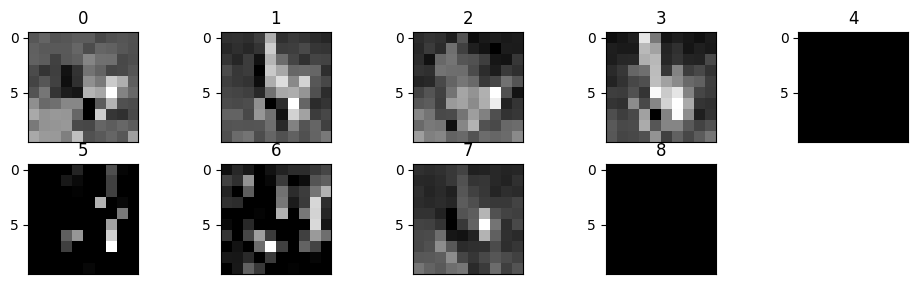

In [ ]:
nplots = 9   # จำนวน Feature Map ที่ต้องการแสดง
fig = plt.figure(figsize=(12, 10))    # ขนาดพล็อต
for j in range(nplots):
  plt.subplot(6, 5, j+1)    # จำนวน row, column
  plt.imshow(feature_maps[0, :, :, j],  cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([])
plt.show()

การทำงาน Model สนใจที่ค่าเมทริกซ์ภายใน ไม่ได้สนใจรูปร่างอยู่แล้ว โดยส่วนใหญ่จะออกแบบให้ Model มีจำนวน Feature Map เพิ่มขึ้น เช่น 32->64->128 (มิติกว้างสูงลดลง แต่มิติความลึกเพิ่มขึ้น)

#(7.) ข้อมูลตัวเลขลายมือ

ข้อนี้จะใช้ข้อมูลตัวเลขลายมือ MNIST เพื่อทำระบบรู้จำเลขลายมือเขียน (Digit Recognition)

In [ ]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()    # Load Dataset

11490434/11490434 [==============================] - 0s 0us/step


ตรวจสอบมิติและจำนวนข้อมูล

In [ ]:
print(X_train.shape)    # Feature
print(X_test.shape)
print(y_train.shape)    # Label/target/class
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


จะได้ว่ามีข้อมูลภาพเลข 0-9 (Sample) ขนาด 28x28 Pixel สำหรับ Train (X_train) จำนวน 6 หมื่นภาพ สำหรับ Test จำนวน 1 หมื่นภาพ

ลองดูข้อมูลที่เก็บในแถวแรก

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(X_train[0])
cv2_imshow(X_train[0,:, 7:20])    # ตัดข้อมูล Pixel มาแสดงบางส่วน
X_train[0,:, 7:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26],
       [  0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172],
       [ 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82],
       [ 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0],
       [  0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0],
       [  0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  35, 

ค่าในเมทริกซ์ตือค่าระดับความสว่างของแต่ละ Pixel โดยมีความสว่างอยู่ระหว่าง 0-255; 0 คือ Pixel มืดสุด, 255 คือ Pixel สว่างสุด


ตรวจดูค่าต่ำสุด สูงสุดของ Pixel ใน Matrix

In [ ]:
np.min(X_train), np.max(X_train)

(0, 255)

ตรวจสอบ Missing Data โดยผลลัพธ์ต้องได้ 0 เพราะข้อมูลที่โหลดมา ไม่มี Missing Data

In [ ]:
np.isnan(X_train).sum()

0


ตรวจดูข้อมูลภาพ ว่ามีเลขอะไรบ้าง(ดู Target/label/class)

In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Label มีตั้งแต่แต่เลข 0-9 ที่กำกับบอกว่าข้อมูลภาพนั้นเป็นเลขอะไร

# (8.) Visualization แสดงภาพตัวเลข

จากข้อที่7 เราเห็นข้อมูลเมทริกซ์ที่เป็นค่าตัวเลข 0-255 ก็คือระดับค่าควมสว่างของแต่ละ Pixel ซึ่งกล่าวอีกนัยคือ ค่านี้เป็น Feature ของภาพตัวเลข ส่วนใน Workshop นี้แสดงการนำข้อมูล Feature ดังกล่าวออกมาแสดงเป็นภาพ

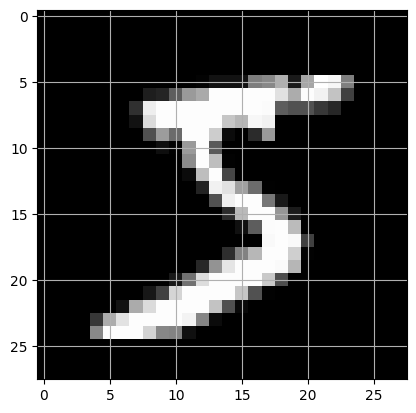

In [ ]:
import matplotlib.pyplot as plt

# ต้องการแสดงรูปตัวเลขลำดับอื่น เปลี่ยนเลข 0 ให้เป็นค่าอื่นๆ (0-59999)
img = X_train[0]    # เลข index ลำดับข้อมูลภาพ
plt.imshow(img, cmap=plt.cm.gray)   # พื้นหลังสีดำ
#plt.imshow(img, cmap=plt.cm.gray_r)   # พื้นหลังสีขาว
plt.grid()
plt.show()

หลักการทั่วไปของการแสดงภาพ คือเม็ด Pixel ใด มีค่าระดับสีสูงๆ จะเปล่งสว่าง แต่ถ้าค่าระดับสีน้อยๆ จะมืด

จากคำสั่งข้างบน จะแสดงภาพแบบสลับสี (Invert) โดยให้ค่า 0 แสดงสีขาวหรือสว่างสุด

ที่ผ่านมาเป็นการแสดงภาพรายการเดียว ลองมาแสดงภาพทีละหลายๆภาพ ตามโค้ดข้างล่างนี้

In [ ]:
def visual_multi(i):
  """Plots 15 digits เริ่มต้นที่ i"""
  nplots = 40   # จำนวน Feature ที่ค้องการแสดง (จำนวนกี่ภาพ)
  fig = plt.figure(figsize=(10,5))     # กำหนดขนาด
  for j in range(nplots):
    plt.subplot(4, 10, j+1)   # 4 Rows x 10 Columns
    plt.imshow(X_train[i+j], cmap=plt.cm.gray_r)   # แสดงภาพ
    plt.title(y_train[i+j])   # เขียนกำกับว่าเป็นเลขอะไร 0 1 2 ... (target/label)
    # plt.axis('off')   # ถ้าไม่ให้แสดงกรอบ
    plt.xticks([]); plt.yticks([])
  plt.show()

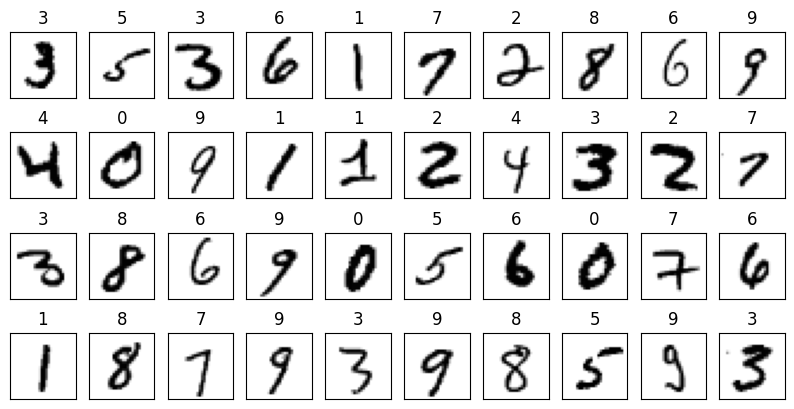

In [ ]:
visual_multi(10)    # เริ่มต้นภาพที่ 10

# (9.) เตรียมข้อมูลเพื่อ Train และ Test

จากข้อที่ 7, 8
- จัดรูปแบบโครงสร้างข้อมูล: จัดให้ตรงกับ CNN ของ Tensorflow
เนื่องจากข้อมูลที่โหลดมานั้น มีโครงสร้างเป็น 60000 ภาพ 28 แถว x 28 คอลัมน์ (เป็น Array 2 มิติ) -> 60000x28x28 ให้เปลี่ยนเป็น 60000x28x28x1 ซึ่งโครงสร้างคล้ายของเดิม แต่มี 1 Channel (จากที่โหลดมา ไม่มีระบุว่ามีกี่ Channel เลยอนุมานไปตามนี้) โครงสร้างที่จัด ต้องอยู่ในรูปแบบ samples x W x H x channel เช่น 60000x28x28x1 หรือภาพสีก็ต้องมี 60000x28x28x3

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ตรวจดูโครงสร้างก่อนจัดรูปแบบ

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
# หรือใช้ -1 แทนจำนวนแถวคงเดิมได้
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [ ]:
# แบบอัตโนมัติ ไม่กำหนดค่าตัวเลขเอง
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [ ]:
# ใช้ np.expand_dims เพื่อเพิ่มมิติข้างหลัง(-1) W x H
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


การแสดงให้เห็นว่าโครงสร้างข้อมูลจริงๆในขณะนี้ (X_train) เป็นอย่างไร สามารถทำได้โดยใช้คำสั่ง print Numpy ได้เลย แต่อาจจะค่อนข้างเข้าใจยาก เนื่องจากมีข้อมูลและวงเล็บซ้อนกันเป็นจำนวนมาก เพื่อให้เข้าใจโครงสร้างข้อมูล ลองดูโค้ดต่อไปนี้

In [ ]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
print(a)
a.shape

[[1 2 3]
 [4 5 6]]


(2, 3)

จะเห็นว่าเป็น 2 มิติ เทียบเท่ากับ เมทริกซ์ WxH ของภาพ

In [ ]:
a_2 = np.expand_dims(a, -1)   # จัดโครงสร้างข้อมูลใหม่
print(a_2)
a_2.shape

[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]


(2, 3, 1)

มีมิติเพิ่มขึ้นอีก 1 มิติ เทียบเท่ากับ 1 Channel

- Normalizaion: ปรับสเกลข้อมูลให้มีค่าระหว่าง 0 ถึง 1 ทำการเปลี่ยนให้เป็นข้อมูลชนิด float32 และหารด้วย 255.0 (เนื่องจากค่าใน Pixel อยู่ระหว่าง 0-255) ถ้าไม่เปลี่ยนชนิดข้อมูล จะได้ float64 ซึ่งถือว่าใช้ทรัพยากรเกินความจำเป็นสำหรับงานนี้

In [ ]:
X_train = X_train.astype('float32') / 255.0   # เปลี่ยนเป็น float32 แล้วหารด้วย 255
X_test = X_test.astype('float32') / 255.0

โค้ด normalize นี้ รันรอบเดียวพอ

In [ ]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [ ]:
X_train[0,10,10:15]   # ลองตรวจดูข้อมูลบางตำแหน่ง

array([[0.00392157],
       [0.6039216 ],
       [0.99215686],
       [0.3529412 ],
       [0.        ]], dtype=float32)

- เลือกจำนวน: จำนวนภาพที่มีทั้งหมด คือ 60000 จริงๆแล้วสามารถนำเข้าไป Train ได้ทั้งหมดเลย แต่ขั้นตอนการ Train จะใช้เวลานาน ข้อนี้จึงขอแบ่งเอาไป train สัก 10000 ภาพก่อน เนื่องจากข้อมูลเลขมีการคละกันอยู่แล้ว สามารถเลือกจำนวนที่ต้องการโดยกำหนดไปตรงๆเลย

In [ ]:
num_samples = 10000

X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

ตรวจดูข้อมูลภาพที่นำมา เพื่อดูว่าภาพที่นำมาใช้ Train (และ Test) มีความถี่กระจายกันเหมาะสมหรือไม่

In [ ]:
for i in np.unique(y_train):
  print('Class: {} --> Count = {}'.format(i, np.sum(y_train == i)))

Class: 0 --> Count = 1001
Class: 1 --> Count = 1127
Class: 2 --> Count = 991
Class: 3 --> Count = 1032
Class: 4 --> Count = 980
Class: 5 --> Count = 863
Class: 6 --> Count = 1014
Class: 7 --> Count = 1070
Class: 8 --> Count = 944
Class: 9 --> Count = 978


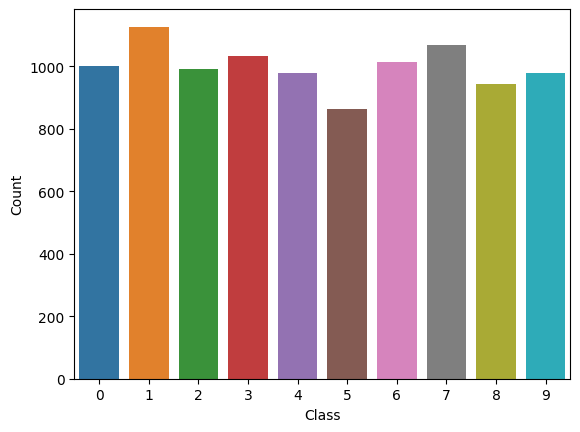

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ข้อมูลนับจำนวนของแต่ละคลาส
class_counts = [np.sum(y_train == i) for i in np.unique(y_train)]

# สร้าง bar plot
sns.barplot(x=np.unique(y_train), y=class_counts)

# เพิ่มป้ายชื่อแกน x และ y (optional)
plt.xlabel('Class')
plt.ylabel('Count')

# แสดงกราฟ
plt.show()

จะพบว่าแต่ละเลข มีจำนวนประมาณ +/- 1000 ถือว่าใช้ได้ แต่ถ้าค่าความถี่ที่ได้ต่างกันมาก เช่น เลขอื่นๆมีหลักพัน แต่เลข 0 1 มีเพียง 300 แบบนี้ถือว่า Bias ต้องหาวิธีการสุ่มใหม่ให้มีความถี่การกระจายใกล้เคียงกัน

In [ ]:
print('Train: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape, y_test.shape))

Train: X=(10000, 28, 28, 1), y=(10000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


ข้อมูล Train มีจำนวน 1 หมื่น เท่ากับจำนวน Test ถือว่า 50:50 ใช้ได้

# (10.) สร้าง Model

จากข้อ 7-9

ก่อนที่จะสร้างโมเดล ต้องกำหนดค่าจำนวนคลาสที่จะให้ Model จำแนกเสียก่อน ซึ่งจริงๆได้ทราบแล้วว่ามี 10 คลาส คือเลข 0-9

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

10

In [ ]:
# กรณีรู้อยู่แล้ว
# num_classes = 10

กำหนดมิติ Input ในที่นี้คือ 28x28x1 (1 Channel หรือ 1 สี)

In [ ]:
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [ ]:
# กรณีรู้อยู่แล้ว
# in_shape = (28, 28, 1)

เริ่มสร้าง Model: Convo(32) -> MaxPool -> Convo(64) -> MaxPool -> Flatten -> ...

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import numpy as np

model = Sequential()    # สร้าง Model

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) # layer 1
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu')) # layer 2
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu')) # layer 3
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
model.summary()   # ดูสรุปโครงสร้าง Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

พล๊อตโครงสร้าง NN ดู

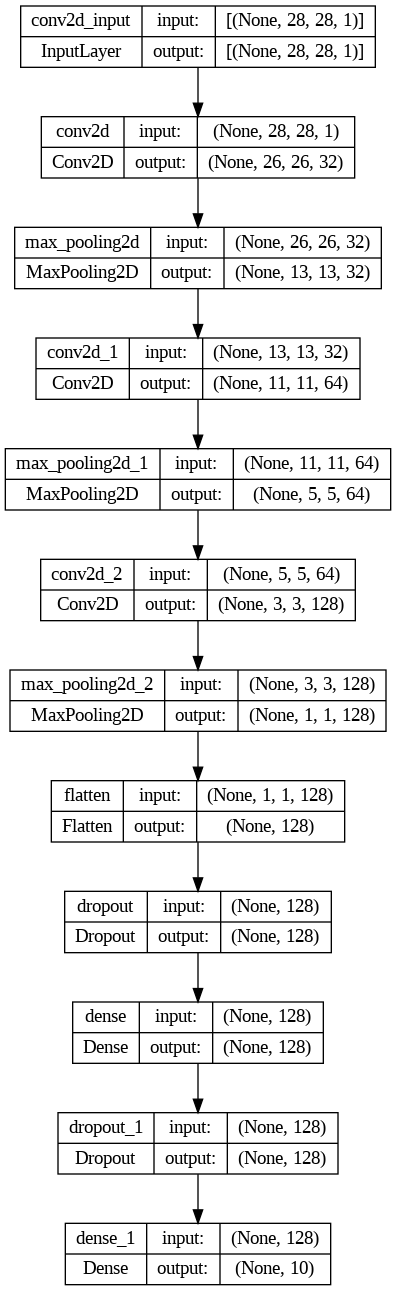

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

ทำการ Compile และ Train Model โดยกำหนด epochs=15 รอบ batch_size=128

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

import time   # สำหรับจับเวลา
start = time.time()     # เวลาเริ่ม

history = model.fit(X_train, y_train, epochs=15, batch_size=128, verbose=1,
                     validation_split=0.1)    # Train

end = time.time()   # เวลาที่เสร็จแล้ว
print("Time Taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/15
71/71 [==============================] - 12s 13ms/step - loss: 1.7809 - accuracy: 0.3863 - val_loss: 0.6674 - val_accuracy: 0.8260
Epoch 2/15
71/71 [==============================] - 1s 8ms/step - loss: 0.7426 - accuracy: 0.7687 - val_loss: 0.2937 - val_accuracy: 0.9180
Epoch 3/15
71/71 [==============================] - 1s 7ms/step - loss: 0.4445 - accuracy: 0.8670 - val_loss: 0.1995 - val_accuracy: 0.9400
Epoch 4/15
71/71 [==============================] - 1s 8ms/step - loss: 0.3369 - accuracy: 0.9052 - val_loss: 0.1558 - val_accuracy: 0.9420
Epoch 5/15
71/71 [==============================] - 1s 8ms/step - loss: 0.2758 - accuracy: 0.9207 - val_loss: 0.1460 - val_accuracy: 0.9500
Epoch 6/15
71/71 [==============================] - 1s 8ms/step - loss: 0.2397 - accuracy: 0.9326 - val_loss: 0.1251 - val_accuracy: 0.9570
Epoch 7/15
71/71 [==============================] - 1s 7ms/step - loss: 0.2213 - accuracy: 0.9343 - val_loss: 0.1213 - val_accuracy: 0.9550
Epoch 8/15
71/71 [

save model

In [ ]:
model.save('mo_8.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ประเมินผล Model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0876 - accuracy: 0.9747
Accuracy: 0.975


พล๊อตดูกราฟค่า Loss

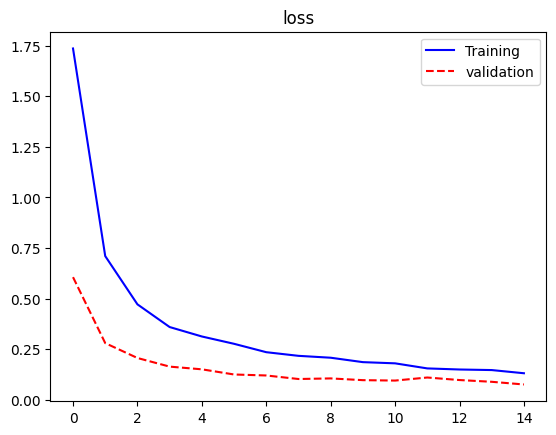

In [ ]:
plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.title('loss')
plt.legend()
plt.show()

ดู Feature maps ชั้นแรก

In [ ]:
from tensorflow.keras.models import Model

md = Model(inputs=model.inputs, outputs=model.layers[0].output) # Layer แรก
feature_maps = md.predict(X_train[0:])
feature_maps.shape

313/313 [==============================] - 2s 5ms/step


(10000, 26, 26, 32)

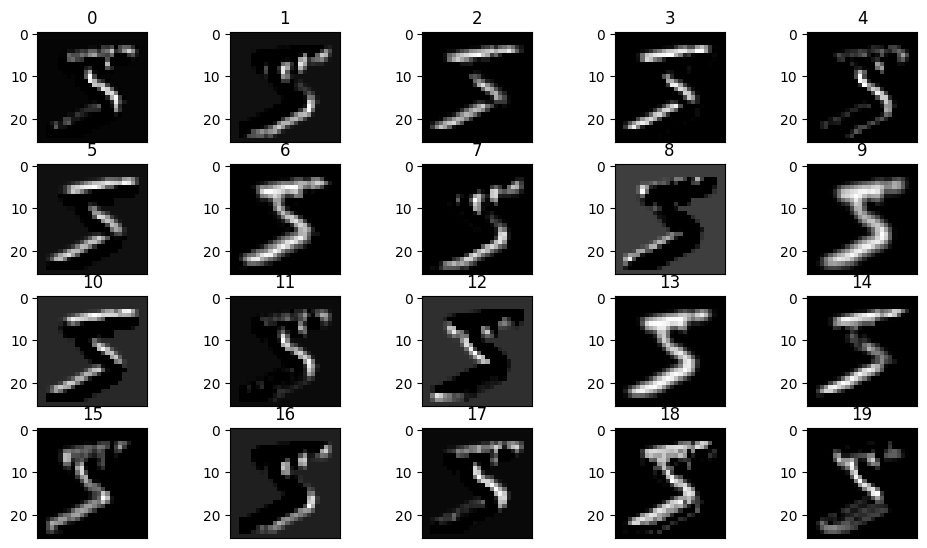

In [ ]:
nplots = 20   # จำนวน Feature Map ที่ต้องการแสดง
fig = plt.figure(figsize=(12, 10))    # ขนาดพล็อต
for j in range(nplots):
  plt.subplot(6, 5, j+1)    # จำนวน row, column
  plt.imshow(feature_maps[0, :, :, j],  cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([])
plt.show()

ดู Feature maps ชั้นที่สอง

In [ ]:
from tensorflow.keras.models import Model

md = Model(inputs=model.inputs, outputs=model.layers[1].output) # Layer สอง
feature_maps = md.predict(X_train[0:])
feature_maps.shape

313/313 [==============================] - 2s 5ms/step


(10000, 13, 13, 32)

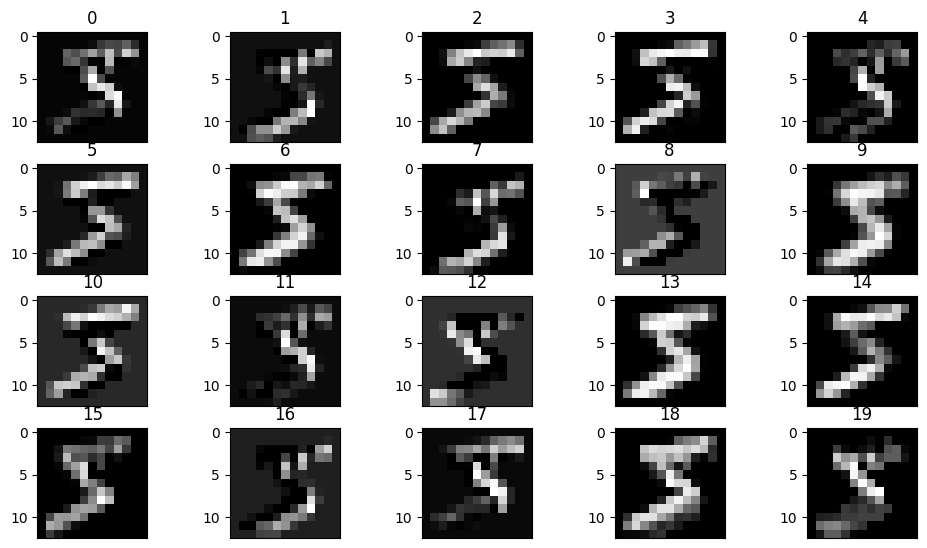

In [ ]:
nplots = 20   # จำนวน Feature Map ที่ต้องการแสดง
fig = plt.figure(figsize=(12, 10))    # ขนาดพล็อต
for j in range(nplots):
  plt.subplot(6, 5, j+1)    # จำนวน row, column
  plt.imshow(feature_maps[0, :, :, j],  cmap=plt.cm.gray)
  plt.title(j)
  plt.xticks([])
plt.show()

# (11.) ดูตัวเลขที่ทำนายผิด

ผลการประเมิน Model ของข้อที่ 10 พบว่าได้ความแม่นยำประมาณ 97% แสดงว่ามีการ Predict ผิดพลาดเล็กน้อย (เป็นเรื่องปกติของ Model) โดยข้อนี้จะมาตรวจดูว่า มีตัวเลข ณ แถวใด(ภาพใด) ที่ระบบทำนายผิด

ลำดับแรกนำ X_test เข้าไปทำการ Predict ก่อน จะได้ค่าความน่าจะเป็น จากนั้นใช้ argmax หาว่าลำดับใดความน่าจะเป็นสูงสุด

In [ ]:
y_pred = model.predict(X_test)    # Predict ได้ผลลัพธ์รูปแบบ one-hot vector
y_pred_cls = np.argmax(y_pred, axis=1)    # หาว่าเป็นคลาสใด

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(y_pred[:3])
print(y_pred_cls[:3])

[[5.4928273e-07 8.5793317e-06 1.0052170e-04 2.7625809e-05 8.1610962e-10
  8.1195370e-09 2.7122778e-11 9.9986196e-01 9.6111428e-08 5.7596623e-07]
 [6.9399985e-06 1.3652262e-06 9.9997622e-01 3.8847679e-06 2.0808638e-08
  5.4324008e-09 1.7558756e-07 8.6567834e-06 2.7156491e-06 5.1960165e-09]
 [9.7198006e-07 9.9997574e-01 4.1283806e-06 4.0315524e-07 6.0267380e-06
  3.2554394e-07 1.3616525e-06 8.8751531e-06 1.7895801e-06 2.2425554e-07]]
[7 2 1]


ต่อไป หาลำดับ index ของข้อมูลภาพ (ภาพลำดับใด) ที่ทำนายผิด โดยเปรียบเทียบว่า y ของจริง (y_test) แตกต่างกับ y ที่ Predict หรือทำนายได้ (y_pred_cls)

In [ ]:
idx_miss = np.where(y_pred_cls != y_test)   # y ของจริง ไม่ตรงกับ y ที่ทำนาย
idx_miss

(array([  62,   73,   77,  184,  243,  247,  321,  362,  381,  412,  449,
         511,  571,  582,  591,  597,  642,  646,  659,  707,  717,  720,
         726,  740,  839,  924,  938,  947,  965, 1014, 1039, 1062, 1112,
        1119, 1181, 1182, 1191, 1224, 1226, 1232, 1247, 1256, 1260, 1281,
        1299, 1326, 1364, 1393, 1463, 1530, 1549, 1553, 1570, 1581, 1618,
        1621, 1678, 1681, 1737, 1748, 1754, 1790, 1800, 1808, 1878, 1901,
        1940, 1956, 2016, 2035, 2043, 2044, 2053, 2093, 2109, 2129, 2130,
        2135, 2148, 2182, 2189, 2225, 2293, 2299, 2325, 2329, 2380, 2405,
        2406, 2408, 2454, 2455, 2496, 2573, 2582, 2597, 2607, 2648, 2654,
        2665, 2742, 2770, 2907, 2927, 2939, 2959, 2961, 2970, 2979, 2995,
        3012, 3030, 3060, 3073, 3115, 3130, 3157, 3225, 3251, 3329, 3365,
        3384, 3436, 3475, 3503, 3520, 3533, 3558, 3726, 3762, 3767, 3776,
        3778, 3780, 3796, 3853, 3855, 3871, 3906, 3941, 3962, 3968, 4027,
        4065, 4078, 4152, 4163, 4176, 

ดูจำนวนตัวที่ผิดพลาด

In [ ]:
len(idx_miss[0])

267

ดูว่าที่ผิดพลาดนั้น ของจริงเป็นเลขอะไร และที่Predictทำนายเป็นเลขอะไร

In [ ]:
print(y_test[idx_miss][:10])
print(y_pred_cls[idx_miss][:10])

[9 9 2 8 7 4 2 2 3 5]
[5 8 7 2 2 6 7 7 7 3]


ตัวแรก: ของจริง 9 แต่ทำนายได้ 5
ตัวที่สอง: ของจริง 9 แต่ทำนายได้ 8
ตัวที่สาม: ของจริง 2 แต่ทำนายได้ 7
...

สาเหตุอาจเนื่องจากตัวเลขเหล่านี้ มีข้อมูล Feature ใกล้เคียงกัน ทำให้ Predict ผิดพลาด

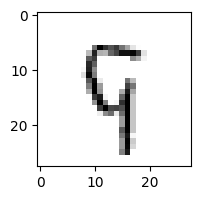

In [ ]:
fig = plt.figure(figsize=(2,2))   # ขนาดรูปจะให้เล็กใหญ่ขนาดไหน
# เนื่องจาก Feature ผ่านการ reshape มาแล้ว ต้องทำการ reshape ให้เป็น 28x28 ก่อน แล้วค่อยพล็อตรูป
plt.imshow(X_test[idx_miss][0].reshape(28, 28), cmap=plt.cm.gray_r)
plt.show()

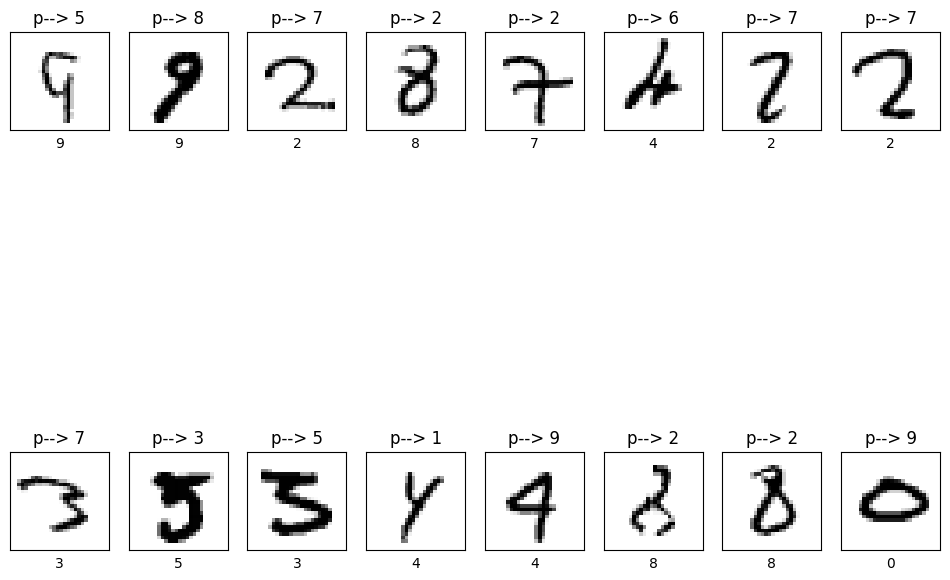

In [ ]:
nplots = 16   # จำนวน Feature Map ที่ต้องการแสดง
fig = plt.figure(figsize=(12, 10))    # ขนาดพล็อต
for j,k in enumerate(idx_miss[0]):
  plt.subplot(2, 8, j+1)    # จำนวน row, column
  # เนื่องจาก Feature ผ่านการ reshape มาแล้ว ต้องทำการ reshape ให้เป็น 28x28 ก่อน แล้วค่อยพล็อตรูป
  plt.imshow(X_test[k].reshape(28, 28), cmap=plt.cm.gray_r)
  plt.title('p--> {}'.format(y_pred_cls[k]))
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_test[k])
  if j >= nplots-1:
    break
plt.show()

# (12.) เขียนตัวเลขด้วยลายมือแล้วทำนาย

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/deep_greenbook/savemodel/mo_8.h5')
model

สร้างไฟล์รูปตัวเลขจากลายมือของตัวเอง ใช้ model ต่อจากข้อ10

ข้อนี้ ใช้งานฟังก์ชันที่เกี่ยวกับภาพ Pillow หรือ PIL

In [ ]:
pip install Pillow

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

# ไฟล์เลขที่จะทำนาย
img = load_img('/content/drive/MyDrive/deep_greenbook/image/digit2.png', target_size=(28,28))
img   # แสดงภาพตัวเอง

In [ ]:
from PIL import Image, ImageOps

img = ImageOps.invert(img)   # ทำการกลับ ขาว<-->ดำ (Invert)
img

In [ ]:
img = img_to_array(img)
img = rgb_to_grayscale(img)   # รันรอบเดียวพอ

In [ ]:
print('shape=', img.shape)
print('min pixel value=', np.min(img))
print('max pixel value=', np.max(img))

shape= (28, 28, 1)
min pixel value= 0.0
max pixel value= 254.97452


ปรับสเกลสีให้มีค่า 0 ถึง 1 (์Normalize)

In [ ]:
img = img / 255.0
print('min pixel value=', np.min(img))
print('max pixel value=', np.max(img))

min pixel value= 0.0
max pixel value= 0.99990004


จัดรูปแบบให้เป็น batch_size, w, h, channel

In [ ]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 28, 28, 1)

ทำการทำนายภาพที่เอามา

In [ ]:
y_pred = model.predict(img)
y_pred.round(3)

1/1 [==============================] - 0s 171ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
predicted = np.argmax(y_pred, -1)   # หรือใช้ axis=1 ก็ได้
predicted

array([2])

ใช้ argmax อ่านตำแหน่งความน่าจะเป็นสูงสุดจะได้ว่า ภาพนี้คือหมายเลข 2

([], [])

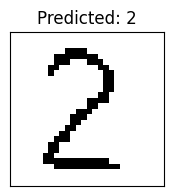

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(img[0], cmap=plt.cm.gray_r)    # พื้นหลังขาว
plt.title('Predicted: {}'.format(predicted[0]))
plt.xticks([])
plt.yticks([])

**ลอง Predict ทีละหลายๆไฟล์**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def predict_digit(imgs):
  y_pred = []; y_pred_cls = []; img_lst = []  # list สำหรับเก็บข้อมูล
  for i in imgs:
    img = load_img(i, target_size=(28, 28))   # โหลดภาพแล้วปรับขนาดให้เป็น 28x28
    img = ImageOps.invert(img)   # ทำการกลับ ขาว<-->ดำ (Invert)
    img = img_to_array(img)     # เปลี่ยนเป็น Array
    img = rgb_to_grayscale(img)   # เปลี่ยนเป็นโทนเทา (ขาวดำ)
    img = img / 255.0
    img_lst.append(img)

    img = np.expand_dims(img, axis=0)   # ปรับให้เป็น batch_size, w, h, channel
    y_pred_i = model.predict(img)     # Predict
    y_pred_cls_i = np.argmax(y_pred_i, -1)    # ผล Predict ว่าเป็น Class อะไร
    y_pred.append(y_pred_i)
    y_pred_cls.append(y_pred_cls_i)
  return img_lst, y_pred_cls, y_pred

# รายการไฟล์ที่ส่งเข้าไป Predict
imgfiles = ['/content/drive/MyDrive/deep_greenbook/image/digit0.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit1.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit2.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit3.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit4.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit5.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit6.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit7.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit8.png',
            '/content/drive/MyDrive/deep_greenbook/image/digit9.png']

img_lst, y_pred_cls, y_pred = predict_digit(imgfiles)   # เรียกฟังก์ชันเพื่อ Predict

1/1 [==============================] - 0s 28ms/step


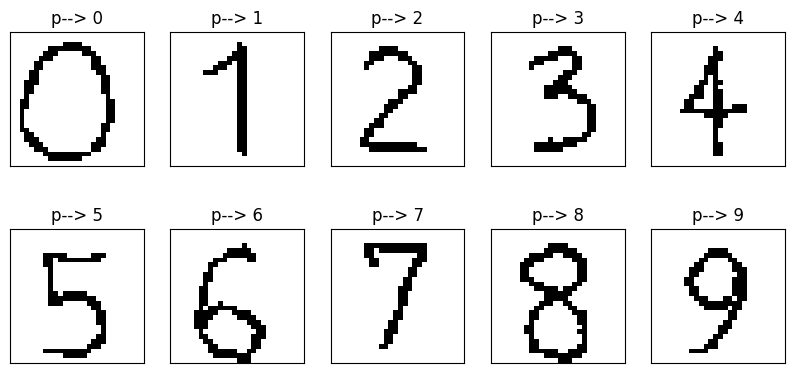

In [ ]:
fig = plt.figure(figsize=(10, 4.7))
for i, k in enumerate(img_lst):   # วน loop อ่านค่า list แล้วพล็อต
  plt.subplot(2, 5, i+1)
  plt.imshow(k, cmap=plt.cm.gray_r)   # พล็อตตัวเลขที่ทำนาย
  plt.title('p--> {}'.format(y_pred_cls[i][0]))
  plt.xticks([])
  plt.yticks([])
plt.show()

# (13.) การสร้าง Dataset ข้อมูลตัวเลข

- **เตรียมไฟล์ภาพหลายมือเขียน** (เอาน้อยๆก่อนก็ได้)
- **เปลี่ยนจากภาพเป็นข้อมูล Feature**: อ่านไฟล์ภาพ -> เปลี่ยนเป็นโทนเทา -> Invert กลับขาวเป็นดำ ดำเป็นขาว -> ย่อขนาดให้ได้ Feature ตามต้องการ เช่น 28x28

ถ้าเขียนเลขให้ลายเส้นเป็นสีดำบนพื้นขาว ต้องทำการ Invert กลับ เนื่องจากเส้น หรือจุด Pixel ดำมีค่าเป็น 0 แต่ถ้าเขียนเลขลายเส้นสีขาวบนพื้นดำ ไม่ต้องทำการ Invert

In [ ]:
from PIL import Image, ImageOps

imgfile = '/content/drive/MyDrive/deep_greenbook/image/digit0.png'    # ไฟล์เลข ที่จะใช้นำไปทำ dataset
img = Image.open(imgfile).convert('L')    # อ่านข้อมูลภาพเป็นโทนเทา
img = ImageOps.invert(img)    # ทำการกลับ ขาว<-->ดำ (Invert)
img = img.resize((8,8), Image.ANTIALIAS)   # ลดขนาดและปรับ anti-alias

img

<ipython-input-21-019bc4ae36d9>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8), Image.ANTIALIAS)   # ลดขนาดและปรับ anti-alias


ปรับระดับค่าความเข้ม Pixel ให้เป็นไปตามค่าที่ต้องการ แล้วเปลี่ยนเป็น integer เช่น ถ้าต้องการระดับ 0-16 ก็คำนวณเปลี่ยนดังนี้ (หากใช้ระดับ 0-255 ก็ไม่ต้องเปลี่ยน)

In [ ]:
pixel = np.array(img)
pixel = (pixel / 255.0) * 16    # ต้องการค่าระดับสเกลภาพ 0-16
pixel = pixel.astype('int')
pixel

array([[0, 0, 2, 6, 4, 0, 0, 0],
       [0, 4, 8, 3, 7, 4, 0, 0],
       [0, 8, 0, 0, 0, 8, 0, 0],
       [4, 5, 0, 0, 0, 7, 2, 0],
       [7, 2, 0, 0, 0, 5, 4, 0],
       [7, 2, 0, 0, 0, 7, 2, 0],
       [2, 8, 1, 0, 3, 8, 0, 0],
       [0, 2, 8, 8, 8, 1, 0, 0]])

In [ ]:
digit_0 = pixel.reshape(1, -1)[0]   # ข้อมูล Feature ของหมายเลข 0
digit_0

array([0, 0, 2, 6, 4, 0, 0, 0, 0, 4, 8, 3, 7, 4, 0, 0, 0, 8, 0, 0, 0, 8,
       0, 0, 4, 5, 0, 0, 0, 7, 2, 0, 7, 2, 0, 0, 0, 5, 4, 0, 7, 2, 0, 0,
       0, 7, 2, 0, 2, 8, 1, 0, 3, 8, 0, 0, 0, 2, 8, 8, 8, 1, 0, 0])

จะได้ข้อมูล Feature ที่เป็นลักษณะ Array แถวเดียว (เมทริกซ์ 1 แถว 64 คอลัมน์)

ทำลักษณะนี้กับเลขอื่นๆให้ครบด้วย ลองแค่ 1, 2, 3 ก่อน

In [ ]:
imgfile = '/content/drive/MyDrive/deep_greenbook/image/digit1.png'    # ไฟล์เลข ที่จะใช้นำไปทำ dataset
img = Image.open(imgfile).convert('L')    # อ่านข้อมูลภาพเป็นโทนเทา
img = ImageOps.invert(img)    # ทำการกลับ ขาว<-->ดำ (Invert)
img = img.resize((8,8), Image.ANTIALIAS)   # ลดขนาดและปรับ anti-alias
pixel = np.array(img)
pixel = (pixel / 255.0) * 16    # ต้องการค่าระดับสเกลภาพ 0-16
pixel = pixel.astype('int')
digit_1 = pixel.reshape(1, -1)[0]   # ข้อมูล Feature ของหมายเลข 1

imgfile = '/content/drive/MyDrive/deep_greenbook/image/digit2.png'    # ไฟล์เลข ที่จะใช้นำไปทำ dataset
img = Image.open(imgfile).convert('L')    # อ่านข้อมูลภาพเป็นโทนเทา
img = ImageOps.invert(img)    # ทำการกลับ ขาว<-->ดำ (Invert)
img = img.resize((8,8), Image.ANTIALIAS)   # ลดขนาดและปรับ anti-alias
pixel = np.array(img)
pixel = (pixel / 255.0) * 16    # ต้องการค่าระดับสเกลภาพ 0-16
pixel = pixel.astype('int')
digit_2 = pixel.reshape(1, -1)[0]   # ข้อมูล Feature ของหมายเลข 2

imgfile = '/content/drive/MyDrive/deep_greenbook/image/digit3.png'    # ไฟล์เลข ที่จะใช้นำไปทำ dataset
img = Image.open(imgfile).convert('L')    # อ่านข้อมูลภาพเป็นโทนเทา
img = ImageOps.invert(img)    # ทำการกลับ ขาว<-->ดำ (Invert)
img = img.resize((8,8), Image.ANTIALIAS)   # ลดขนาดและปรับ anti-alias
pixel = np.array(img)
pixel = (pixel / 255.0) * 16    # ต้องการค่าระดับสเกลภาพ 0-16
pixel = pixel.astype('int')
digit_3 = pixel.reshape(1, -1)[0]   # ข้อมูล Feature ของหมายเลข 3

<ipython-input-24-832195e0eb4c>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8), Image.ANTIALIAS)   # ลดขนาดและปรับ anti-alias
<ipython-input-24-832195e0eb4c>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8), Image.ANTIALIAS)   # ลดขนาดและปรับ anti-alias
<ipython-input-24-832195e0eb4c>:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8), Image.ANTIALIAS)   # ลดขนาดและปรับ anti-alias


In [ ]:
digit_1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 9, 7, 0, 0, 0, 0, 0, 6, 4, 6, 0,
       0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0, 0, 1,
       7, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [ ]:
digit_2

array([ 0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  8,  7,  7,  1,  0,  0,  0,
        0,  2,  0,  3,  7,  0,  0,  0,  0,  0,  1,  8,  3,  0,  0,  0,  0,
        0,  9,  2,  0,  0,  0,  0,  0,  7,  2,  0,  0,  0,  0,  0,  3, 10,
        5,  5,  2,  0,  0,  0,  0,  1,  3,  4,  3,  0,  0])

In [ ]:
digit_3

array([ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  5,  7,  7,  5,  0,  0,  0,
        0,  1,  1,  7,  2,  0,  0,  0,  0,  0, 10, 10,  3,  0,  0,  0,  0,
        0,  1,  0,  7,  3,  0,  0,  0,  0,  0,  0,  6,  4,  0,  0,  0,  2,
        6,  7,  7,  0,  0,  0,  0,  1,  2,  1,  0,  0,  0])

เมื่อทำครบทุกตัว ให้รวมแถวและคอลัมน์

In [ ]:
import pandas as pd
df = pd.DataFrame([digit_0])    # สร้าง DataFrame ลำดับแรก (Feature เลขตัวแรก)
df = df.append([digit_1])     # นำ Feature เลขตัวต่อๆไปมาต่อกัน
df = df.append([digit_2])     # ถ้ามีจำนวนมาก ควรเขียนแบบใช้การวนรอบ
df = df.append([digit_3])     # สมมติว่ามี 4 Samples (4 Rows)
df

<ipython-input-28-ce6f655947c1>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([digit_1])     # นำ Feature เลขตัวต่อๆไปมาต่อกัน
<ipython-input-28-ce6f655947c1>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([digit_2])     # ถ้ามีจำนวนมาก ควรเขียนแบบใช้การวนรอบ
<ipython-input-28-ce6f655947c1>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([digit_3])     # สมมติว่ามี 4 Samples (4 Rows)


0   1   2   3   4   5   6   7   8   9   10  11  ...  52  53  54  55  56  57  58  59  60  61  62  63
0   0   0   2   6   4   0   0   0   0   4   8   3  ...   3   8   0   0   0   2   8   8   8   1   0   0
0   0   0   0   0   2   0   0   0   0   0   1   9  ...   7   0   0   0   0   0   0   0   2   0   0   0
0   0   0   0   3   0   0   0   0   0   0   8   7  ...   5   2   0   0   0   0   1   3   4   3   0   0
0   0   0   0   0   2   0   0   0   0   0   5   7  ...   7   7   0   0   0   0   1   2   1   0   0   0

[4 rows x 64 columns]

In [ ]:
# Target/Label ตัวเลข เพื่อระบุว่า Feature ใน df คือเลขอะไร (ต้องสัมพันธ์กับ df ก่อนหน้านี้)
y = [0, 1, 2, 3]    # Target ใน df คือเลข 0 1 2 3

ได้ข้อมูล Feature และ Target สามารถบันทึกเก็บไฟล์ CSV หรือนำไปใช้ได้

# (14.) Deploy Model on Web

Deploy ใช้งาน Model บน Flask โดยยกตัวอย่างกรณีตรวจจับลายมือตัวเลข ซึ่งมีการทำงานโดยรวมคือ ฝั่ง Client อ่านภาพ จากนั้นส่ง request ไปยัง Web server จากนั้น Model ก็จะทำการ Predict แล้วส่งกลับมายัง Client ว่าเป็นเลขอะไร

## Server
โหลด Model แล้วใช้ Flask รันเป็น Web server

In [ ]:
pip install flask

In [ ]:
import numpy as np
import json
from flask import Flask, request
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

model = load_model('/content/drive/MyDrive/deep_greenbook/savemodel/mo_8.h5')
print('model: ', model.get_config()['layers'][0]['config']['batch_input_shape'])

model:  (None, 28, 28, 1)


In [ ]:
app = Flask(__name__)   # Web server รับ Request Method POST
@app.route('/model', methods=['POST'])
def run_model():
  req_data = request.get_json(force=True)
  image_data = req_data['img']
  img = np.array(image_data).reshape(28,28,1)

  image = np.array(image_data).reshape(1,28,28,1)
  pred = model.predict(image)   # Predict
  digit = np.argmax(pred)
  return str(digit)   # ส่งผลการ Predict กลับไปยัง Client

if __name__ == '__main__':
  app.run()   # รัน Web Server

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


## Client
ฝั่ง Client สมมติว่าใช้กล้องหรืออ่านไฟล์ภาพลายมือตัวเลข ได้ค่า Numpy array แล้วสร้างเป็นข้อมูล JSON จากนั้น ทำการ Request ส่ง JSON ด้วยวิธี POST ไปให้ Web Server แล้ว Response กลับมา

อ่านภาพ -> Numpy array -> JSON -> ส่ง Request ไป Webserver -> Model predict -> ได้ตัวเลข -> ส่งตัวเลขกลับมาที่ Client

In [ ]:
import numpy as np
import json
from flask import Flask, request
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale
from PIL import Image, ImageOps

img = load_img('/content/drive/MyDrive/deep_greenbook/image/digit2.png', target_size=(28,28))
img = ImageOps.invert(img)    # ทำการกลับ ขาว<-->ดำ (Invert)
img = img_to_array(img)
img = rgb_to_grayscale(img)
img = img / 255.0    # ต้องการค่าระดับสเกลภาพ 0-1

img_lst = np.squeeze(img).tolist()    # แปลงเป็น List
data = json.dumps({'img': img_lst})   # ส่งเป็น JSON
url = 'http://127.0.0.1:5000/model'   # Request ไปยัง Web server

# ส่งข้อมูล Numpy array ไปยัง Web server
response = request.post(url, data)   # ได้ผลการ Predict กลับมาที่ response
print('Digit =', response.text)

เมื่อรันโค้ด client จะได้ error ตามนี้

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.

ถ้ารันได้ตามหนังสือจะได้ผลตามนี้

`Digit = 2   # ผลการ Predict`

# (15.) แปลง .h5 เป็น TensorFlow Lite

แปลง TensorFlow Model .h5 ไปเป็น TensorFlow Lite หรือ TFlite (ลดขนาด Model ให้เล็กลงจาก .h5)

มี 2 แบบคือ แบบปกติ, แบบ Optimizer หรือบีบอัด
- แบบปกติ

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf

model = load_model('/content/drive/MyDrive/deep_greenbook/savemodel/mo_8.h5')   # โหลด Model ที่ได้จาก TensorFlow ปกติ
converter = tf.lite.TFLiteConverter.from_keras_model(model)   # แปลง
tflite_float_model = converter.convert()

f = open('mo8_float.tflite', "wb")   # บันทึกไฟล์ที่แปลงแล้ว
f.write(tflite_float_model)
f.close()

float_model_size = len(tflite_float_model) / 1024   # แสดงขนาดที่แปลงแล้ว
print('Float model size = %d KBs' %(float_model_size))

Float model size = 435 KBs


- แบบ optimization ไฟล์ Model จะมีขนาดเล็กหลาเท่าตัว แต่ประสิทธิภาพอาจด้อยลง

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf

model = load_model('/content/drive/MyDrive/deep_greenbook/savemodel/mo_8.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]    # เพิ่ม optiom เพื่อการ Optimize
tflite_quantized_model = converter.convert()

quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %d KBs' %(quantized_model_size))
print('which is about %d%% of the float model size.'\
      %(quantized_model_size * 100 / float_model_size))

f = open('mo8_quantized.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

Quantized model size = 116 KBs
which is about 26% of the float model size.


## การเรียกใช้ TensorFlow Lite

In [ ]:
# โหลดภาพแล้วปรับขนาดให้เป็น 28x28
test_img = load_img('/content/drive/MyDrive/deep_greenbook/image/digit2.png', target_size=(28, 28))
test_img = ImageOps.invert(test_img)   # ทำการกลับ ขาว<-->ดำ (Invert)
test_img = img_to_array(test_img)     # เปลี่ยนเป็น Array
test_img = rgb_to_grayscale(test_img)   # เปลี่ยนเป็นโทนเทา (ขาวดำ)
test_img = test_img / 255.0
test_img = np.expand_dims(test_img, axis=0)   # ปรับให้เป็น batch_size, w, h, channel

In [ ]:
import tensorflow as tf
from time import time
tflite_path = '/content/mo8_float.tflite'   # ไฟล์ Model TFlite
interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()

input = interpreter.get_input_details()
input_tensor_index = input[0]["index"]
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

# test_image คือ ข้อมูลที่อินพุตเข้า Model โดย shape=(1,28,28,1)
interpreter.set_tensor(input_tensor_index, test_img)
interpreter.invoke()    # ทำการ Predict

digit = np.argmax(output()[0])
print(digit)

2
